In [12]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#input descriptor
# dust
# humidity 
# surrounding temperature

# output descriptor
# ac temperature

#every variable has three variations low,mid and high

In [14]:
#generating the universe
x_dust=np.arange(0,11,1)
x_humidity=np.arange(0,11,1)
x_stemp=np.arange(0,50,1)
x_actemp=np.arange(15,30,1)

In [15]:
#generating fuzzy membership functions
lo_dust=fuzz.trimf(x_dust,[0,0,5])
mid_dust=fuzz.trimf(x_dust,[0,5,10])
hig_dust=fuzz.trimf(x_dust,[5,10,10])

lo_humidity=fuzz.trimf(x_humidity,[0,0,5])
mid_humidity=fuzz.trimf(x_humidity,[0,5,10])
hig_humidity=fuzz.trimf(x_humidity,[5,10,10])

lo_stemp=fuzz.trimf(x_stemp,[0,0,26])
mid_stemp=fuzz.trimf(x_stemp,[0,26,50])
hig_stemp=fuzz.trimf(x_stemp,[26,50,50])

lo_actemp=fuzz.trimf(x_actemp,[15,15,23])
mid_actemp=fuzz.trimf(x_actemp,[15,23,30])
hig_actemp=fuzz.trimf(x_actemp,[23,30,30])
lo_dust

array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

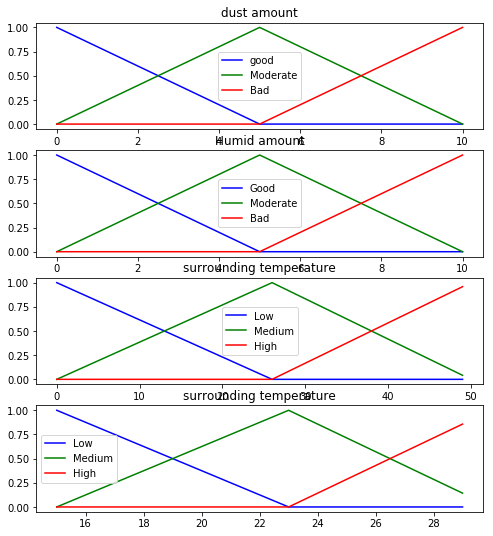

In [16]:
#visualsing
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_dust, lo_dust, 'b', linewidth=1.5, label='good')
ax0.plot(x_dust, mid_dust, 'g', linewidth=1.5, label='Moderate')
ax0.plot(x_dust, hig_dust, 'r', linewidth=1.5, label='Bad')
ax0.set_title('dust amount')
ax0.legend()

ax1.plot(x_humidity, lo_humidity, 'b', linewidth=1.5, label='Good')
ax1.plot(x_humidity, mid_humidity, 'g', linewidth=1.5, label='Moderate')
ax1.plot(x_humidity, hig_humidity, 'r', linewidth=1.5, label='Bad')
ax1.set_title('Humid amount')
ax1.legend()

ax2.plot(x_stemp, lo_stemp, 'b', linewidth=1.5, label='Low')
ax2.plot(x_stemp, mid_stemp, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_stemp, hig_stemp, 'r', linewidth=1.5, label='High')
ax2.set_title('surrounding temperature')
ax2.legend()

ax3.plot(x_actemp, lo_actemp, 'b', linewidth=1.5, label='Low')
ax3.plot(x_actemp, mid_actemp, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_actemp, hig_actemp, 'r', linewidth=1.5, label='High')
ax3.set_title('surrounding temperature')
ax3.legend()

plt.savefig("genetics fig/convex1.png")

In [17]:
#making fuzzy rules 
dust_level_lo = fuzz.interp_membership(x_dust, lo_dust, 8.0)
dust_level_mid = fuzz.interp_membership(x_dust, mid_dust, 8.0)
dust_level_hig = fuzz.interp_membership(x_dust, hig_dust, 8.0)

humidity_level_lo = fuzz.interp_membership(x_humidity, lo_humidity, 2.0)
humidity_level_mid = fuzz.interp_membership(x_humidity, mid_humidity, 2.0)
humidity_level_hig = fuzz.interp_membership(x_humidity, hig_humidity, 2.0)

stemp_level_lo = fuzz.interp_membership(x_stemp, lo_stemp, 37.0)
stemp_level_mid = fuzz.interp_membership(x_stemp, mid_stemp, 37.0)
stemp_level_hig = fuzz.interp_membership(x_stemp, hig_stemp, 37.0)

actemp_level_lo = fuzz.interp_membership(x_actemp, lo_actemp, 11.5)
actemp_level_mid = fuzz.interp_membership(x_actemp, mid_actemp, 11.5)
actemp_level_hig = fuzz.interp_membership(x_actemp, hig_actemp, 11.5)




In [18]:
#defining rules

#rule1 if humidity or dust or stemp is low 
valr1 = np.fmax(dust_level_lo, humidity_level_lo)
rule1=np.fmax(valr1,stemp_level_lo )
ac_activation_lo = np.fmin(rule1, lo_actemp)

In [19]:
#rule2 if humidity or dust or stemp is moderate 
valr2 = np.fmax(dust_level_mid, humidity_level_mid)
rule2=np.fmax(valr2,stemp_level_mid )
ac_activation_mid = np.fmin(rule2, mid_actemp)

In [20]:
#rule if humidity or dust or stemp is high
valr3 = np.fmax(dust_level_hig, humidity_level_hig)
rule3=np.fmax(valr3,stemp_level_hig )
ac_activation_hig= np.fmin(rule3, hig_actemp)
#creating a base or default values for visualization
ac0 = np.zeros_like(x_actemp)
ac0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

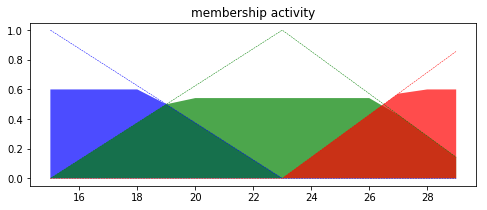

In [21]:
#visualize the result

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_actemp, ac0, ac_activation_lo, facecolor='b', alpha=0.7)

ax0.plot(x_actemp, lo_actemp, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_actemp, ac0, ac_activation_mid, facecolor='g', alpha=0.7)

ax0.plot(x_actemp, mid_actemp, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_actemp, ac0, ac_activation_hig, facecolor='r', alpha=0.7)

ax0.plot(x_actemp, hig_actemp, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('membership activity')

plt.savefig("genetics fig/convex2.png")

In [11]:
#doing defuzzzification
aggregated = np.fmax(ac_activation_lo,
                     np.fmax(ac_activation_mid, ac_activation_hig))

# Calculate defuzzified result
actempval = fuzz.defuzz(x_actemp, aggregated, 'centroid')
actempval

21.968054504163515